In [6]:
import os
import pandas as pd
# create the feature- and actuals-data list
# set the feature and actuals year lists
feature_years = ['2017','2018','2019','2020']
actual_years = ['2018','2019','2020','2021']

actuals_df_list = []
features_df_list = []

# path to the current directory
current_dir = os.getcwd()

for i in range(len(feature_years)):
    # relative paths to the parquet files
    relative_path_features = os.path.join('..', 'data', 'cm_features_to_oct' + feature_years[i] + '.parquet')
    relative_path_actuals = os.path.join('..', 'data', 'cm_actuals_' + actual_years[i] + '.parquet')

    path_features = os.path.join(current_dir, relative_path_features)
    path_actuals = os.path.join(current_dir, relative_path_actuals)

    # append datasets to the lists
    actuals_df_list.append({'year':actual_years[i], 'data':pd.read_parquet(path_actuals, engine='pyarrow')})
    features_df_list.append({'year':feature_years[i], 'data':pd.read_parquet(path_features, engine='pyarrow')})

# concat the feature datasets, so that every data contains the observations starting with january 1990
for i in range(1,len(features_df_list)):
    features_df_list[i]['data'] = pd.concat([features_df_list[i-1]['data'], features_df_list[i]['data']])

country_list = sorted(features_df_list[3]['data'].index.get_level_values('country_id').unique().tolist())

# country group list of all four datasets
country_feature_group_list = []
country_actual_group_list = []
# fill list 
for i in range(len(features_df_list)):
    country_feature_group_list.append(features_df_list[i]['data'].groupby('country_id'))
    country_actual_group_list.append(actuals_df_list[i]['data'].groupby('country_id'))

In [7]:
pd.options.display.max_rows = 1000


data = country_feature_group_list[0].get_group(220)

#data = drop_before_conflict_trap(data, 30, 6, 76)

#data#.loc[:,'ged_sb'] == 0
data

,,gleditsch_ward,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_sb_tlag_1,...,ind_efficiency_t48,irr_agr_efficiency_t48,services_efficiency_t48,general_efficiency_t48,water_stress_t48,renewable_internal_pcap_t48,renewable_pcap_t48,splag_1_decay_ged_sb_5,splag_1_decay_ged_os_5,splag_1_decay_ged_ns_5
month_id,country_id,,,,,,,,,,,,,,,,,,,,,
121,220,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12034097.0,0.0,...,10.461296,0.177730,9.847276,1.206181,81.054017,648.111933,1526.861568,2.979504,2.037624,1.125000
122,220,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12034097.0,0.0,...,10.461296,0.177730,9.847276,1.206181,81.054017,648.111933,1526.861568,2.951619,3.032253,1.121441
123,220,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12034097.0,0.0,...,10.461296,0.177730,9.847276,1.206181,81.054017,648.111933,1526.861568,3.030524,2.945930,1.117984
124,220,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12034097.0,0.0,...,10.461296,0.177730,9.847276,1.206181,81.054017,648.111933,1526.861568,3.001187,2.945061,1.114626
125,220,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12034097.0,0.0,...,10.461296,0.177730,9.847276,1.206181,81.054017,648.111933,1526.861568,2.972685,2.889689,1.111362
126,220,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12034097.0,0.0,...,10.461296,0.177730,9.847276,1.206181,81.054017,648.111933,1526.861568,2.916527,2.835893,1.108192
127,220,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12034097.0,0.0,...,10.461296,0.177730,9.847276,1.206181,81.054017,648.111933,1526.861568,2.996430,2.783629,1.105112
128,220,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12034097.0,0.0,...,10.461296,0.177730,9.847276,1.206181,81.054017,648.111933,1526.861568,3.022592,2.704385,1.102120
129,220,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12034097.0,0.0,...,10.461296,0.177730,9.847276,1.206181,81.054017,648.111933,1526.861568,2.965013,2.627396,1.099213


In [8]:
prediction_year = '2021' # 2019, 2020, 2021
country_to_plot = 70 # 70 220
s = 8


dataset_index = actual_years.index(prediction_year)
actual_data = actuals_df_list[dataset_index]['data']
actual_group = actual_data.groupby('country_id')
y_true = actual_group.get_group(country_to_plot).iloc[s-3,0]
prediction_month = actual_data.index.get_level_values('month_id').unique().to_list()[s-3]

In [9]:
import pandas as pd
from joblib import load
import numpy as np
import os

# Pfad zur Parquet-Datei
parquet_file_path = r'C:\Users\Tobias\Documents\BAconflictPrediction\ConflictPrediction\benchmark views\bm_cm_last_historical_poisson_expanded_2021.parquet'
# Parquet-Datei in ein DataFrame einlesen
benchmark_data = pd.read_parquet(parquet_file_path)

parquet_file_path = r'C:\Users\Tobias\iCloudDrive\Joblib BA\final_views_baseline_submission\bodentien_rueter_cm_nbinom_test_window_2021.parquet'
# Parquet-Datei in ein DataFrame einlesen
baseline_nbinom_data = pd.read_parquet(parquet_file_path)

parquet_file_path = r'C:\Users\Tobias\iCloudDrive\Joblib BA\final_views_baseline_submission\cm_hurdle_test_window_2021.parquet'
# Parquet-Datei in ein DataFrame einlesen
baseline_hurdle_data = pd.read_parquet(parquet_file_path)

parquet_file_path = r'C:\Users\Tobias\iCloudDrive\Joblib BA\final_views_baseline_submission\cm_NeuralNet_test_window_2021.parquet'
# Parquet-Datei in ein DataFrame einlesen
baseline_nn_data = pd.read_parquet(parquet_file_path)

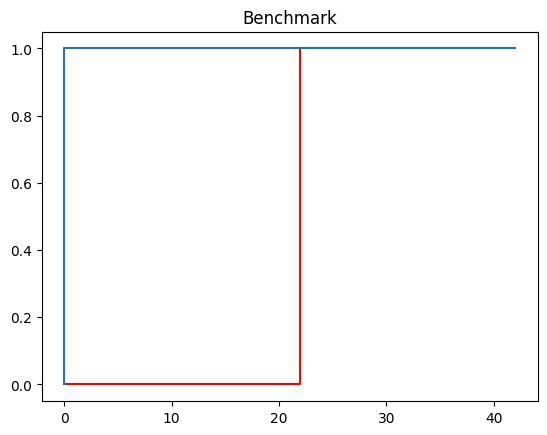

In [10]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

empirical_distribution_benchmark = benchmark_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_benchmark = np.sort(empirical_distribution_benchmark)

sample = empirical_distribution_benchmark
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)

below_min = np.array(range(0, min(sample)))
x = np.concatenate((below_min, x))
num_zeros = len(below_min)
y = np.concatenate((np.array([0]*num_zeros), y))

## make sure that (0,0) is included
x = np.concatenate((np.array([0]), x))
y = np.concatenate((np.array([0]), y))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(max(sample)+1, max_value))
x = np.concatenate((x, above_max))
num_ones = len(above_max)
y = np.concatenate((y , np.array([1]*num_ones)))

sample_true = int(y_true)
x_acutal = np.array([sample_true])
y_acutal = np.array([1])

below_min = np.array(range(0, sample_true))
x_acutal = np.concatenate((below_min, x_acutal))
num_zeros = len(below_min)
y_acutal = np.concatenate((np.array([0]*num_zeros), y_acutal))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(sample_true+1, max_value))
x_acutal = np.concatenate((x_acutal, above_max))
num_ones = len(above_max)
y_acutal = np.concatenate((y_acutal , np.array([1]*num_ones)))

plt.step(x_acutal, y_acutal, color='red')
plt.step(x, y)
plt.title('Benchmark')
plt.show()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_18788\21312234.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  empirical_distribution_NBbaseline = baseline_nbinom_data.loc[(prediction_month,country_to_plot),:].values.flatten()


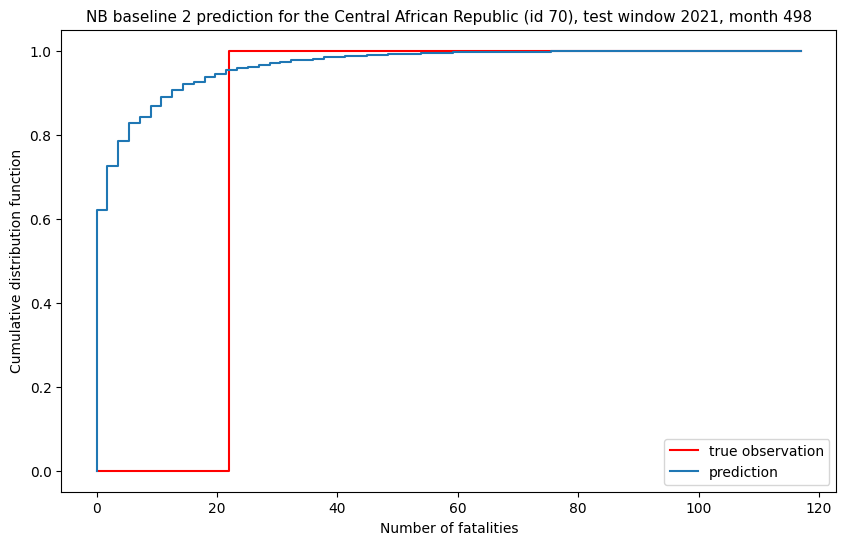

In [11]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

empirical_distribution_NBbaseline = baseline_nbinom_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_NBbaseline = np.sort(empirical_distribution_NBbaseline)

sample = empirical_distribution_NBbaseline
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)

below_min = np.array(range(0, min(sample)))
x = np.concatenate((below_min, x))
num_zeros = len(below_min)
y = np.concatenate((np.array([0]*num_zeros), y))

## make sure that (0,0) is included
x = np.concatenate((np.array([0]), x))
y = np.concatenate((np.array([0]), y))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(max(sample)+1, max_value))
x = np.concatenate((x, above_max))
num_ones = len(above_max)
y = np.concatenate((y , np.array([1]*num_ones)))

sample_true = int(y_true)
x_acutal = np.array([y_true])
y_acutal = np.array([1])

below_min = np.array(range(0, sample_true))
x_acutal = np.concatenate((below_min, x_acutal))
num_zeros = len(below_min)
y_acutal = np.concatenate((np.array([0]*num_zeros), y_acutal))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(sample_true+1, max_value))
x_acutal = np.concatenate((x_acutal, above_max))
num_ones = len(above_max)
y_acutal = np.concatenate((y_acutal , np.array([1]*num_ones)))

plt.figure(figsize=(10, 6))

plt.step(x_acutal, y_acutal, color='red')
plt.step(x, y)
plt.xlabel('Number of fatalities')
plt.ylabel('Cumulative distribution function')
plt.title('NB baseline 2 prediction for the Central African Republic (id 70), test window 2021, month ' + str(prediction_month), fontsize=11, y=1)
plt.legend(loc='lower right', labels=['true observation', 'prediction'])
plt.show()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_18788\1067653013.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  empirical_distribution_HURDLEbaseline = baseline_hurdle_data.loc[(prediction_month,country_to_plot),:].values.flatten()


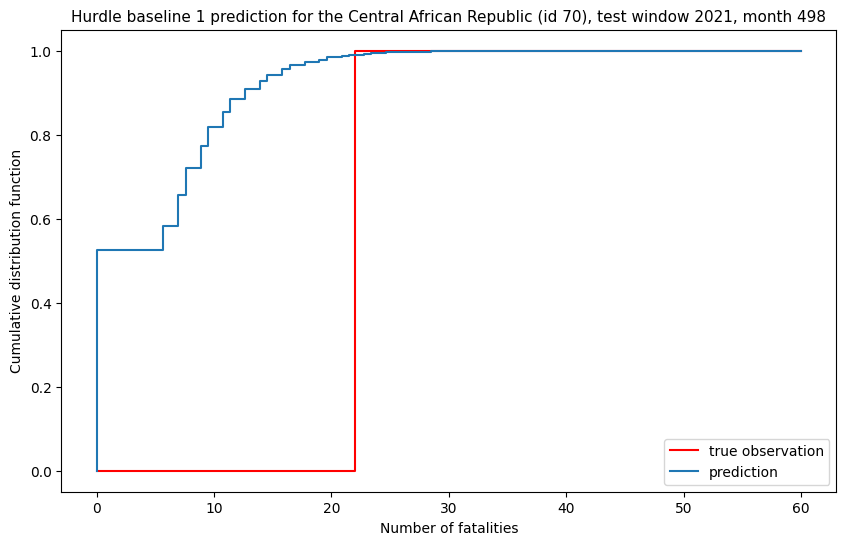

In [12]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

empirical_distribution_HURDLEbaseline = baseline_hurdle_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_HURDLEbaseline = np.sort(empirical_distribution_HURDLEbaseline)

sample = empirical_distribution_HURDLEbaseline
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)

below_min = np.array(range(0, min(sample)))
x = np.concatenate((below_min, x))
num_zeros = len(below_min)
y = np.concatenate((np.array([0]*num_zeros), y))

## make sure that (0,0) is included
x = np.concatenate((np.array([0]), x))
y = np.concatenate((np.array([0]), y))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(max(sample)+1, max_value))
x = np.concatenate((x, above_max))
num_ones = len(above_max)
y = np.concatenate((y , np.array([1]*num_ones)))



sample_true = int(y_true)
x_acutal = np.array([y_true])
y_acutal = np.array([1])

below_min = np.array(range(0, sample_true))
x_acutal = np.concatenate((below_min, x_acutal))
num_zeros = len(below_min)
y_acutal = np.concatenate((np.array([0]*num_zeros), y_acutal))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(sample_true+1, max_value))
x_acutal = np.concatenate((x_acutal, above_max))
num_ones = len(above_max)
y_acutal = np.concatenate((y_acutal , np.array([1]*num_ones)))

plt.figure(figsize=(10, 6))

plt.step(x_acutal, y_acutal, color='red')
plt.step(x, y)
plt.xlabel('Number of fatalities')
plt.ylabel('Cumulative distribution function')
plt.title('Hurdle baseline 1 prediction for the Central African Republic (id 70), test window 2021, month ' + str(prediction_month), fontsize=11, y=1)
plt.legend(loc='lower right', labels=['true observation', 'prediction'])
plt.show()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_18788\2027735919.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  empirical_distribution_NNbaseline = baseline_nn_data.loc[(prediction_month,country_to_plot),:].values.flatten()


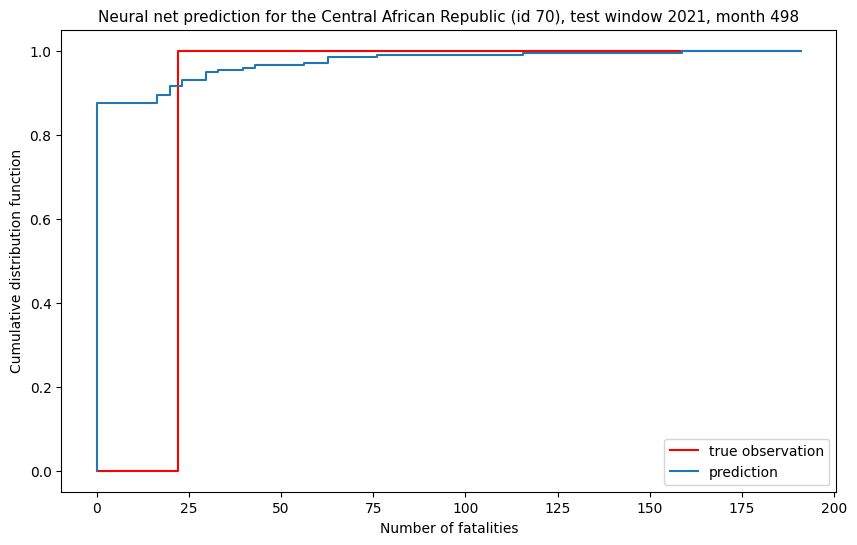

In [13]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

empirical_distribution_NNbaseline = baseline_nn_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_NNbaseline = np.sort(empirical_distribution_NNbaseline)

sample = empirical_distribution_NNbaseline
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)

below_min = np.array(range(0, min(sample)))
x = np.concatenate((below_min, x))
num_zeros = len(below_min)
y = np.concatenate((np.array([0]*num_zeros), y))

## make sure that (0,0) is included
x = np.concatenate((np.array([0]), x))
y = np.concatenate((np.array([0]), y))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(max(sample)+1, max_value))
x = np.concatenate((x, above_max))
num_ones = len(above_max)
y = np.concatenate((y , np.array([1]*num_ones)))

sample_true = int(y_true)
x_acutal = np.array([y_true])
y_acutal = np.array([1])

below_min = np.array(range(0, sample_true))
x_acutal = np.concatenate((below_min, x_acutal))
num_zeros = len(below_min)
y_acutal = np.concatenate((np.array([0]*num_zeros), y_acutal))

if y_true < max(sample):
    max_value = max(sample) + 30
else:
    max_value = int(y_true) + 20
above_max = np.array(range(sample_true+1, max_value))
x_acutal = np.concatenate((x_acutal, above_max))
num_ones = len(above_max)
y_acutal = np.concatenate((y_acutal , np.array([1]*num_ones)))

plt.figure(figsize=(10, 6))

plt.step(x_acutal, y_acutal, color='red')
plt.step(x, y)
plt.xlabel('Number of fatalities')
plt.ylabel('Cumulative distribution function')
plt.title('Neural net prediction for the Central African Republic (id 70), test window 2021, month ' + str(prediction_month), fontsize=11, y=1)
plt.legend(loc='lower right', labels=['true observation', 'prediction'])
plt.show()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_18788\1869681005.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  empirical_distribution_NBbaseline = baseline_nbinom_data.loc[(prediction_month,country_to_plot),:].values.flatten()
C:\Users\Tobias\AppData\Local\Temp\ipykernel_18788\1869681005.py:38: PerformanceWarning: indexing past lexsort depth may impact performance.
  empirical_distribution_HURDLEbaseline = baseline_hurdle_data.loc[(prediction_month,country_to_plot),:].values.flatten()
C:\Users\Tobias\AppData\Local\Temp\ipykernel_18788\1869681005.py:72: PerformanceWarning: indexing past lexsort depth may impact performance.
  empirical_distribution_NNbaseline = baseline_nn_data.loc[(prediction_month,country_to_plot),:].values.flatten()


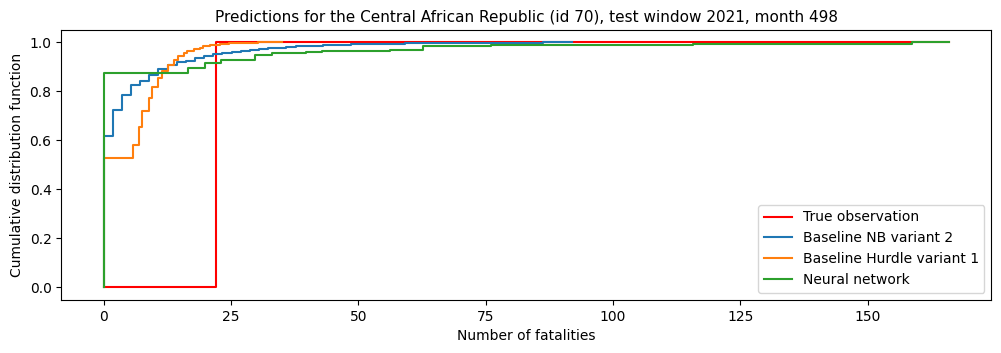

In [14]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

empirical_distribution_NBbaseline = baseline_nbinom_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_NBbaseline = np.sort(empirical_distribution_NBbaseline)

sample = empirical_distribution_NBbaseline
ecdf = sm.distributions.ECDF(sample)

x_nb = np.linspace(min(sample), max(sample))
y_nb = ecdf(x_nb)

below_min = np.array(range(0, min(sample)))
x_nb = np.concatenate((below_min, x_nb))
num_zeros = len(below_min)
y_nb = np.concatenate((np.array([0]*num_zeros), y_nb))

## make sure that (0,0) is included
x_nb = np.concatenate((np.array([0]), x_nb))
y_nb = np.concatenate((np.array([0]), y_nb))

if y_true < max(sample):
    max_value = max(sample) + 5
else:
    max_value = int(y_true) + 5
above_max = np.array(range(max(sample)+1, max_value))
x_nb = np.concatenate((x_nb, above_max))
num_ones = len(above_max)
y_nb = np.concatenate((y_nb , np.array([1]*num_ones)))







empirical_distribution_HURDLEbaseline = baseline_hurdle_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_HURDLEbaseline = np.sort(empirical_distribution_HURDLEbaseline)

sample = empirical_distribution_HURDLEbaseline
ecdf = sm.distributions.ECDF(sample)

x_hurdle = np.linspace(min(sample), max(sample))
y_hurdle = ecdf(x_hurdle)

below_min = np.array(range(0, min(sample)))
x_hurdle = np.concatenate((below_min, x_hurdle))
num_zeros = len(below_min)
y_hurdle = np.concatenate((np.array([0]*num_zeros), y_hurdle))

## make sure that (0,0) is included
x_hurdle = np.concatenate((np.array([0]), x_hurdle))
y_hurdle = np.concatenate((np.array([0]), y_hurdle))

if y_true < max(sample):
    max_value = max(sample) + 5
else:
    max_value = int(y_true) + 5
above_max = np.array(range(max(sample)+1, max_value))
x_hurdle = np.concatenate((x_hurdle, above_max))
num_ones = len(above_max)
y_hurdle = np.concatenate((y_hurdle , np.array([1]*num_ones)))








empirical_distribution_NNbaseline = baseline_nn_data.loc[(prediction_month,country_to_plot),:].values.flatten()
empirical_distribution_NNbaseline = np.sort(empirical_distribution_NNbaseline)

sample = empirical_distribution_NNbaseline
ecdf = sm.distributions.ECDF(sample)

x_nn = np.linspace(min(sample), max(sample))
y_nn = ecdf(x_nn)

below_min = np.array(range(0, min(sample)))
x_nn = np.concatenate((below_min, x_nn))
num_zeros = len(below_min)
y_nn = np.concatenate((np.array([0]*num_zeros), y_nn))

## make sure that (0,0) is included
x_nn = np.concatenate((np.array([0]), x_nn))
y_nn = np.concatenate((np.array([0]), y_nn))

if y_true < max(sample):
    max_value = max(sample) + 5
else:
    max_value = int(y_true) + 5
above_max = np.array(range(max(sample)+1, max_value))
x_nn = np.concatenate((x_nn, above_max))
num_ones = len(above_max)
y_nn = np.concatenate((y_nn , np.array([1]*num_ones)))




sample_true = int(y_true)
x_acutal = np.array([y_true])
y_acutal = np.array([1])

below_min = np.array(range(0, sample_true))
x_acutal = np.concatenate((below_min, x_acutal))
num_zeros = len(below_min)
y_acutal = np.concatenate((np.array([0]*num_zeros), y_acutal))

## make sure that (0,0) is included
x_acutal = np.concatenate((np.array([0]), x_acutal))
y_acutal = np.concatenate((np.array([0]), y_acutal))

if y_true < max(sample):
    max_value = max(sample) + 5
else:
    max_value = int(y_true) + 5
above_max = np.array(range(sample_true+1, max_value))
x_acutal = np.concatenate((x_acutal, above_max))
num_ones = len(above_max)
y_acutal = np.concatenate((y_acutal , np.array([1]*num_ones)))

plt.figure(figsize=(12, 3.5))

plt.step(x_acutal, y_acutal, color='red')
plt.step(x_nb, y_nb)
plt.step(x_hurdle, y_hurdle)
plt.step(x_nn, y_nn)
plt.xlabel('Number of fatalities')
plt.ylabel('Cumulative distribution function')
plt.title('Predictions for the Central African Republic (id 70), test window 2021, month ' + str(prediction_month), fontsize=11, y=1)
plt.legend(loc='lower right', labels=['True observation', 'Baseline NB variant 2', 'Baseline Hurdle variant 1', 'Neural network'])
plt.show()

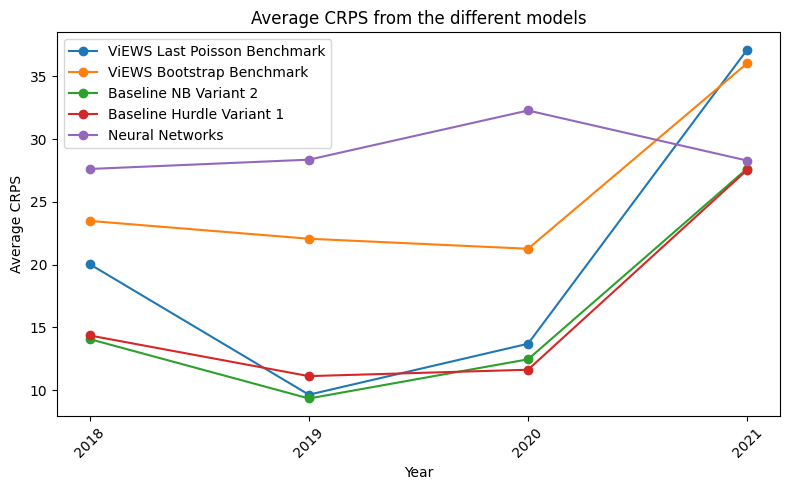

In [15]:
import matplotlib.pyplot as plt

# Daten
methoden = [
    'ViEWS Last Poisson Benchmark',
    'ViEWS Bootstrap Benchmark',
    'Baseline NB Variant 2',
    'Baseline Hurdle Variant 1',
    'Neural Networks'
]

# Werte für jedes Jahr und jede Methode
werte = {
    '2018': [20.04, 23.49, 14.07, 14.36, 27.63],
    '2019': [9.64, 22.07, 9.34, 11.12, 28.37],
    '2020': [13.70, 21.27, 12.46, 11.63, 32.29],
    '2021': [37.13, 36.05, 27.66, 27.55, 28.30]
}

# Plot erstellen
plt.figure(figsize=(8, 5))

# Für jede Methode eine Linie zeichnen
for i, methode in enumerate(methoden):
    plt.plot(werte.keys(), [werte[jahr][i] for jahr in werte.keys()], marker='o', label=methode)

# Titel und Achsenbeschriftungen
plt.title('Average CRPS from the different models')
plt.xlabel('Year')
plt.ylabel('Average CRPS')

# Legende hinzufügen
plt.legend()

# Diagramm anzeigen
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


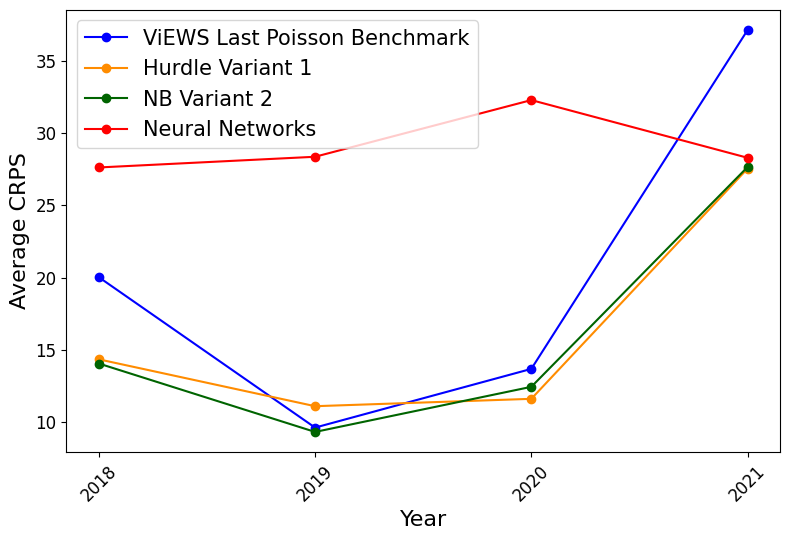

In [20]:
import matplotlib.pyplot as plt

# Daten
methoden = [
    'ViEWS Last Poisson Benchmark',
    'Hurdle Variant 1',
    'NB Variant 2',
    'Neural Networks'
]

# Werte für jedes Jahr und jede Methode
werte = {
    '2018': [20.04, 14.36, 14.07, 27.63],
    '2019': [9.64, 11.12, 9.34, 28.37],
    '2020': [13.70, 11.63, 12.46, 32.29],
    '2021': [37.13, 27.55, 27.66, 28.30]
}

# Farben definieren
farben = ['blue', 'darkorange', 'darkgreen', 'red']

# Plot erstellen
plt.figure(figsize=(8, 5.5))

# Für jede Methode eine Linie zeichnen
for i, methode in enumerate(methoden):
    plt.plot(werte.keys(), [werte[jahr][i] for jahr in werte.keys()], marker='o', label=methode, color=farben[i])

# Titel und Achsenbeschriftungen
#plt.title('Average CRPS Across Different Models', size=16)
plt.xlabel('Year', size='16')
plt.ylabel('Average CRPS', size='16')
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 

# Legende hinzufügen
plt.legend(fontsize='15')

# Diagramm anzeigen
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
